In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st
import numpy as np

In [4]:
da = pd.read_csv('nhanes_2015_2016.csv')
print(da.shape)
da.head()

(5735, 28)


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


- There are missing values in the database. To check that we can match the counted values and shape function:
    - 5474 vs 5735
    
#### DMDEDUC2 - Education level - Adults 20+

In [5]:
print(da.DMDEDUC2.value_counts())
sum(da.DMDEDUC2.value_counts())

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64


5474

In [6]:
pd.isnull(da.DMDEDUC2).sum()

261

Some data bases table use the index value and therefore cannot be read without the support of a codebook! In some cases it is useful to replace integer codes with a text label that reflects the code's meaning. Below, a new variable called 'DMDEDUC2x' that is recoded with text labels, then we generate its frequency distribution.

In [7]:
da['DMDEDUC2x'] = da.DMDEDUC2.replace({1:'<9', 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})

#### Gender

In [8]:
da['RIAGENDR'] = da.RIAGENDR.replace ({1: "Male", 2: "Female"})

- It might be useful to look at the percentage of each category. No need to loop through pandas series or arrays, the operation is executed to each individual element.

In [9]:
countDMDE = da.DMDEDUC2x.value_counts()
countDMDE / countDMDE.sum()

Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: DMDEDUC2x, dtype: float64

In [10]:
countDMDE.index

Index(['Some college/AA', 'College', 'HS/GED', '<9', '9-11', 'Don't know'], dtype='object')

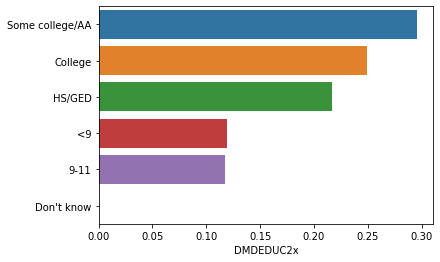

In [11]:
sns.barplot(x = countDMDE/countDMDE.sum(), y = countDMDE.index)
plt.show()

## Numerical summaries

A quick way to get a set of numerical summaries for a quantitative variable is with the describe data frame method. Below we demonstrate how to do this using the body weight variable (BMXWT). 

*good practice*:

As with many surveys, some data values are missing, so we explicitly drop the missing cases using the dropna method before generating the summaries.

#### BMXWT - Weight (kg)



In [12]:
da.BMXWT.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [13]:
x = da.BMXWT.dropna()  # Extract all non-missing values of BMXWT into a variable called 'x'
print(x.mean()) # Pandas method
print(np.mean(x)) # Numpy function

print(x.median())
print(np.percentile(x, 50))  # 50th percentile, same as the median
print(np.percentile(x, 75))  # 75th percentile
print(x.quantile(0.75)) # Pandas method for quantiles, equivalent to 75th percentile

81.34267560889509
81.34267560889509
78.2
78.2
92.7
92.7


In [14]:
da.BMXARMC

0       35.9
1       33.2
2       31.0
3       38.3
4       27.2
        ... 
5730    29.5
5731    42.3
5732    28.8
5733    30.6
5734    26.2
Name: BMXARMC, Length: 5735, dtype: float64

#### Good combination

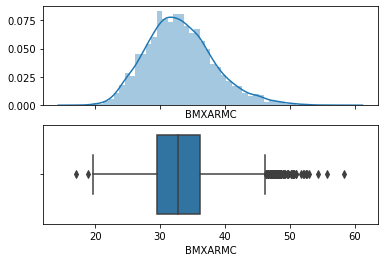

In [15]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
sns.distplot(da.BMXARMC, ax=ax1)
sns.boxplot(x = da.BMXARMC, ax=ax2)
plt.show()

**BPXSY1** Systolic blood pressure

Next we look at frequencies for a systolic blood pressure measurement (BPXSY1). "BPX" here is the NHANES prefix for blood pressure measurements, "SY" stands for "systolic" blood pressure (blood pressure at the peak of a heartbeat cycle), and "1" indicates that this is the first of three systolic blood presure measurements taken on a subject.

A person is generally considered to have pre-hypertension when their systolic blood pressure is between 120 and 139, or their diastolic blood pressure is between 80 and 89. Considering only the systolic condition, we can calculate the proprotion of the NHANES sample who would be considered to have pre-hypertension.

**slicing data frame series**

Working with booleans is a good way to do descriptive analysis :)


In [16]:
da.BPXSY1.head()

0    128.0
1    146.0
2    138.0
3    132.0
4    100.0
Name: BPXSY1, dtype: float64

In [17]:
da.BPXSY1.loc[(da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)].count() / ((da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)).count() #proportionz of pre hypertense people

0.3741935483870968

In [18]:
np.mean((da.BPXSY1 >= 120) & (da.BPXSY2 <= 139))

0.3741935483870968

In [19]:
(da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)

0        True
1       False
2        True
3        True
4       False
        ...  
5730    False
5731    False
5732    False
5733    False
5734    False
Length: 5735, dtype: bool

In [20]:
count = 0
for i in (da.BPXSY1 >= 120) & (da.BPXSY2 <= 139):
    if i == True: count += 1
print(count, count/da.BPXSY1.count())

2146 0.3973338270690613


Next we calculate the propotion of NHANES subjects who are pre-hypertensive based on diastolic blood pressure.

In [21]:
da.loc[(da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)].BPXDI1

1       88.0
14      84.0
19      82.0
24      86.0
28      80.0
        ... 
5707    84.0
5708    82.0
5711    94.0
5713    82.0
5729    80.0
Name: BPXDI1, Length: 849, dtype: float64

In [22]:
np.mean((da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)) #it sums every True (1) and splits that the total occurences

0.14803836094158676

In [23]:
count = 0
for i in (da.BPXDI1 >= 80) & (da.BPXDI2 <= 89):
    if i == True: count += 1
print(count/((da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)).count())

0.14803836094158676


Finally we calculate the proportion of NHANES subjects who are pre-hypertensive based on either systolic or diastolic blood pressure. Since some people are pre-hypertensive under both criteria, the proportion below is less than the sum of the two proportions calculated above.

Since the combined systolic and diastolic condition for pre-hypertension is somewhat complex, below we construct temporary variables 'a' and 'b' that hold the systolic and diastolic pre-hypertensive status separately, then combine them with a "logical or" to obtain the final status for each subject.

In [24]:
a = (da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)
b = (da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)
np.mean(a | b)

0.43975588491717527

In [25]:
count = 0
for i in (a | b):
    if i == True: count += 1
print(count/b.count())

0.43975588491717527


The right way to do it (**my opinion**) is look individually to each column. In the above example, there is no upper limit for the column BPXSY1 and no inferior limit to BPXSY2. In this case, the algorythm might have selected pacients with high variation of blood pressure.

In [26]:
a = (da.BPXSY1 >= 120) & (da.BPXSY1 <= 139)
b = (da.BPXSY2 >= 120) & (da.BPXSY2 <= 139)
ab = (a & b)
count = 0
for i in (ab):
    if i == True: count+=1
print(count)

1719


In [27]:
c = (da.BPXDI1 >= 80) & (da.BPXDI1 <= 89)
d = (da.BPXDI2 >= 80) & (da.BPXDI2 <= 89)
cd = (c & d)
count = 0
for i in (cd):
    if i == True: count+=1
print(count)

516


In [28]:
for i in (ab & cd):
    if i == True: count+=1
print(count/(ab & cd).count())

0.13530950305143855


In [29]:
print((ab | cd).mean()) #if at least in one type of blood pressure the pacient has pre-hypertension
print((ab & cd).mean()) #if our criteria is more restrit

0.34437663469921537
0.045335658238884045


Blood pressure measurements are affected by a phenomenon called "white coat anxiety", in which a subject's bood pressure may be slightly elevated if they are nervous when interacting with health care providers. Typically this effect subsides if the blood pressure is measured several times in sequence. In NHANES, both systolic and diastolic blood pressure are meausred three times for each subject (e.g. BPXSY2 is the second measurement of systolic blood pressure). We can calculate the extent to which white coat anxiety is present in the NHANES data by looking a the mean difference between the first two systolic or diastolic blood pressure measurements.

In [30]:
df = (da.BPXSY1 - da.BPXSY2)
print(df.abs().mean())

df2 = (da.BPXDI1 - da.BPXDI2).abs()
print(np.mean(df2))

3.776494691748929
3.992922331905383


### Graphical summaries

- Analyzing distribution with graphic summaries

In [56]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,DMDEDUC2x
0,83732,1.0,NaN,1.0,1,Male,62,3,1.0,5.0,...,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,College
1,83733,1.0,NaN,6.0,1,Male,53,3,2.0,3.0,...,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,HS/GED
2,83734,1.0,NaN,NaN,1,Male,78,3,1.0,3.0,...,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,HS/GED
3,83735,2.0,1.0,1.0,2,Female,56,3,1.0,5.0,...,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,College
4,83736,2.0,1.0,1.0,2,Female,42,4,1.0,4.0,...,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Some college/AA


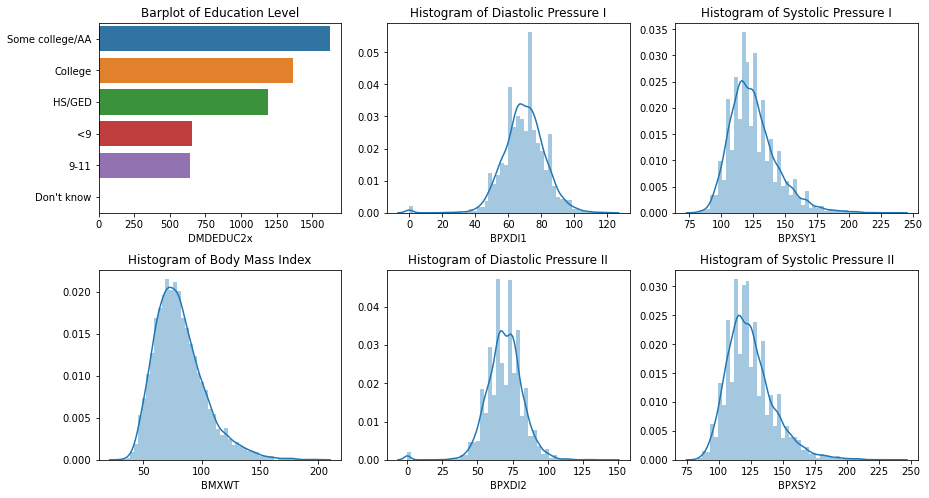

In [57]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize = (13,7))
df = da.DMDEDUC2x.value_counts()
sns.barplot(y = df.index, x = df, ax=ax1).set_title("Barplot of Education Level")
sns.distplot(da.BPXDI1, ax=ax2).set_title("Histogram of Diastolic Pressure I")
sns.distplot(da.BPXDI2, ax=ax5).set_title("Histogram of Diastolic Pressure II")
sns.distplot(da.BPXSY1, ax=ax3).set_title("Histogram of Systolic Pressure I")
sns.distplot(da.BPXSY2, ax=ax6).set_title("Histogram of Systolic Pressure II")
sns.distplot(da.BMXWT, ax=ax4).set_title("Histogram of Body Mass Index")
f.tight_layout(pad=1.0) 
plt.show()


#### Box plot to compare different distributions of blood pressure

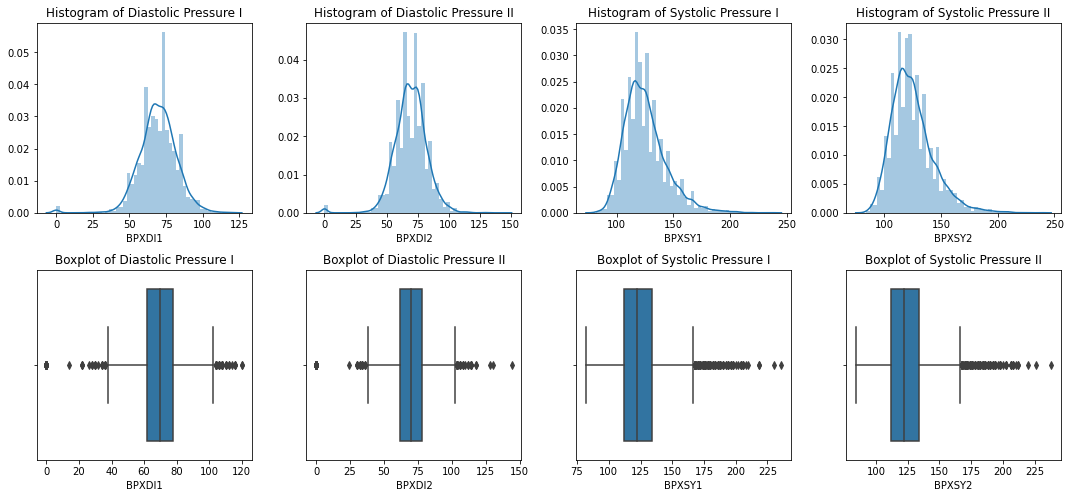

In [58]:
f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4, figsize = (15,7))
sns.distplot(da.BPXDI1, ax=ax1).set_title("Histogram of Diastolic Pressure I")
sns.distplot(da.BPXDI2, ax=ax2).set_title("Histogram of Diastolic Pressure II")
sns.distplot(da.BPXSY1, ax=ax3).set_title("Histogram of Systolic Pressure I")
sns.distplot(da.BPXSY2, ax=ax4).set_title("Histogram of Systolic Pressure II")
sns.boxplot(da.BPXDI1, ax = ax5).set_title("Boxplot of Diastolic Pressure I")
sns.boxplot(da.BPXDI2, ax = ax6).set_title("Boxplot of Diastolic Pressure II")
sns.boxplot(da.BPXSY1, ax = ax7).set_title("Boxplot of Systolic Pressure I")
sns.boxplot(da.BPXSY2, ax = ax8).set_title("Boxplot of Systolic Pressure II")
f.tight_layout(pad = 1.0)
plt.show()

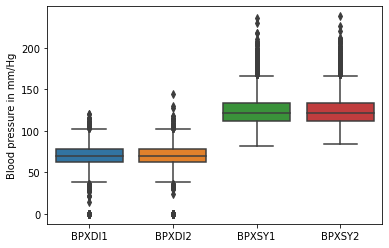

<Figure size 360x216 with 0 Axes>

In [59]:
sns.boxplot(data = da.loc[:,['BPXDI1','BPXDI2','BPXSY1','BPXSY2']]).set_ylabel("Blood pressure in mm/Hg")
plt.figure(figsize = (5,3))
plt.show()

Convert continuous to categorical data... Pandas.cut

In [60]:
da.RIDAGEYR.max()

80

<class 'matplotlib.axes._subplots.AxesSubplot'>


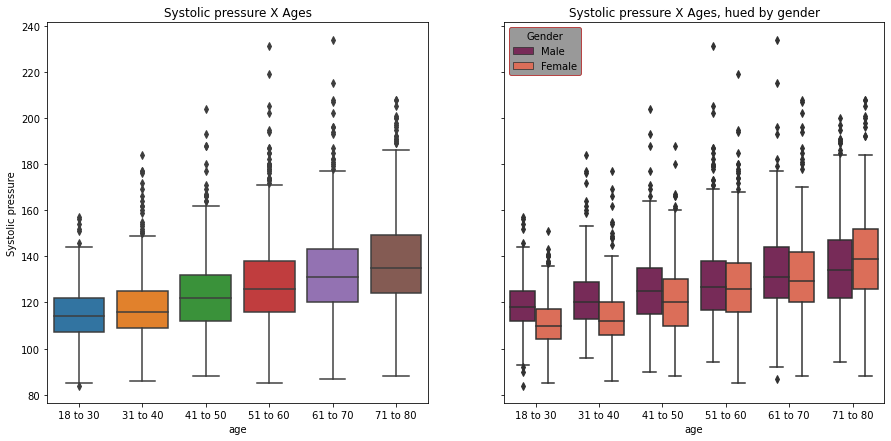

In [61]:
da['age'] = pd.cut(x = da.RIDAGEYR, bins = [18,30,40,50,60,70,80], #bins argument set the intervals or categories
                   labels = ['18 to 30','31 to 40', '41 to 50', '51 to 60', '61 to 70', '71 to 80']) 

da['RIAGENDRx'] = da.RIAGENDR.replace({1 : "Male", 2 : "Female"})
f, (ax1, ax2) = plt.subplots(1,2, figsize = (15,7), sharey= True)

sns.boxplot(x = da.age,
            y = ((da.BPXSY2 + da.BPXSY1)/2),
            ax = ax1).set_ylabel("Systolic pressure X Ages")

box2 = sns.boxplot(x = da.age,
                   y = ((da.BPXSY2 + da.BPXSY1)/2),
                   hue = da.RIAGENDRx,  palette = 'rocket', ax = ax2)

ax1.set_title("Systolic pressure X Ages"), ax2.set_title("Systolic pressure X Ages, hued by gender")
ax1.set_ylabel("Systolic pressure")
ax2.legend(title='Gender',
           loc='upper left',
           facecolor = 'grey',
           edgecolor = 'firebrick')
print(type(box2))
plt.show()

From that we can see that elder people have higher systolic pressure on average. Women tend to have higher pressures at higher ages, that might de due to women's higher life expectancy.

In [62]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'DMDEDUC2x', 'age', 'RIAGENDRx'],
      dtype='object')

Now we get a categorical column to group age ranges, we can analyze how women and men's systolic pressure behave at different ages.

<class 'matplotlib.axes._subplots.AxesSubplot'>


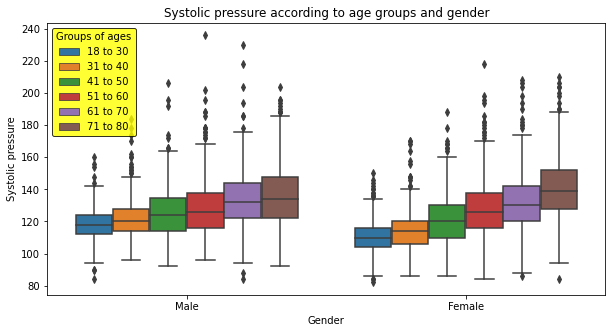

In [63]:
plt.figure(figsize = (10,5))
b = sns.boxplot(x = da.RIAGENDRx,
           y= da.BPXSY1,
           hue = da.age)
b.set(xlabel = "Gender", ylabel = 'Systolic pressure', title = "Systolic pressure according to age groups and gender")

print(type(b))
plt.legend(loc = 'upper left',
          edgecolor = 'black',
          facecolor = 'yellow',
          title = 'Groups of ages')
plt.show()

What if we investigate the correlation between blood pressure and level of education?

In [64]:
da.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

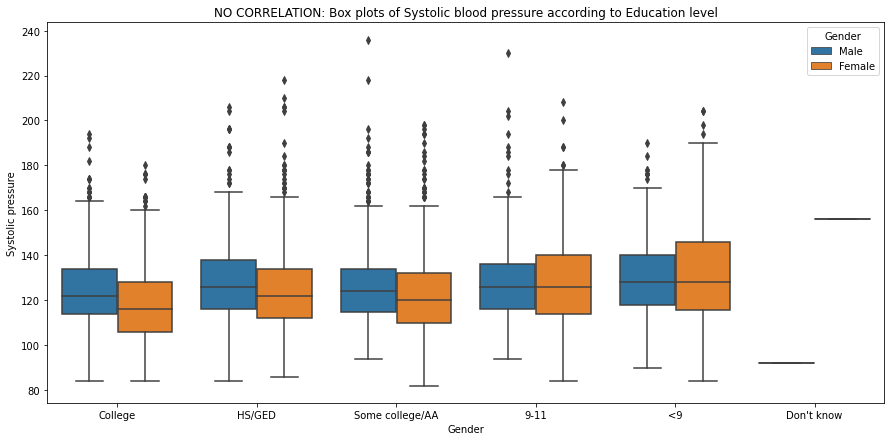

In [65]:
plt.figure(figsize= (15,7))
bpeducation = sns.boxplot(x = 'DMDEDUC2x',
            y = 'BPXSY1',
            hue = 'RIAGENDRx',
            data = da)
bpeducation.set(xlabel = "Gender",
                ylabel = 'Systolic pressure',
                title = "NO CORRELATION: Box plots of Systolic blood pressure according to Education level")
plt.legend(title = 'Gender')

plt.show()

#### Why the graph above does not represent the reality
 
Over the last few decades, it has become much more common for people to at least begin a college degree than it was in the past. Therefore, younger people as a group have higher educational attainment than older people as a group. This contrast possibly creates a false impression that lower educational attainment might cause high blood pressure. But, as these young people grow older, the cross sectional relationship between age and educational attainment will change.

Nevertheless, that could be better addressed if NHANES database had gathered information in different periods, which would allow to grasp if there is a relevant change at blood pressure in different periods for the same education background.


In [66]:
da.shape

(5735, 31)

In [67]:
da.groupby("age").DMDEDUC2x.value_counts()

age       DMDEDUC2x      
18 to 30  Some college/AA    364
          College            278
          HS/GED             237
          9-11                99
          <9                  47
31 to 40  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
41 to 50  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
51 to 60  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
61 to 70  Some college/AA    238
          HS/GED             192
          College            188
          <9                 149
          9-11               111
71 to 80  Some college/AA    217
          HS/GED             184
          <9                 164
          College            156
          9-11   

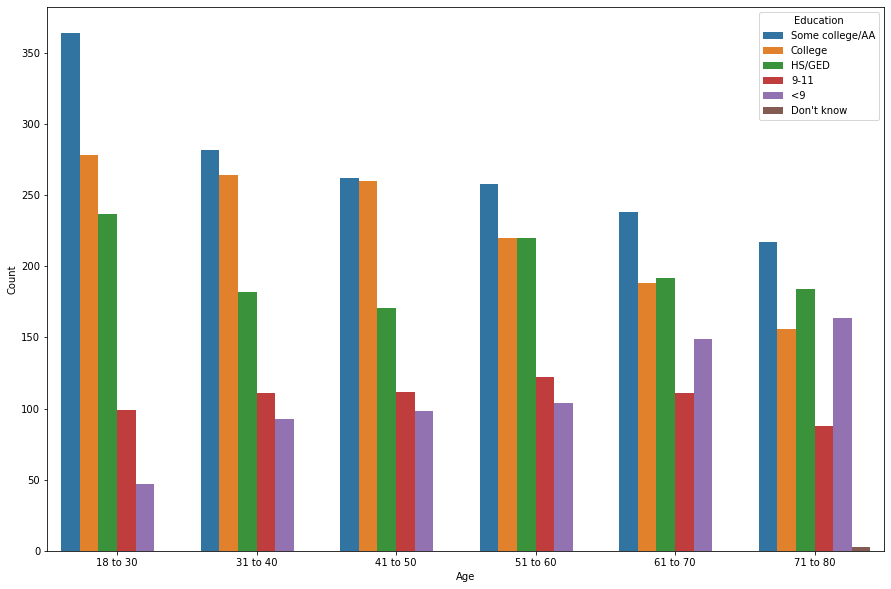

In [151]:
df = da.groupby('age').DMDEDUC2x.value_counts()
df.index = df.index.set_names(['Age', 'Education'])
df1 = df.index.to_frame(index = True)
df1['Count'] = da.groupby('age').DMDEDUC2x.value_counts()

plt.figure(figsize = (15,10))
sns.barplot(x = df1.Age,
            y = df1.Count,
            hue = df1.Education)

plt.show()

We can transform a MultiIndex Pandas Series into a data frame. From that, we can build graphs with categorical data. It is clearly portrayed that educational attainment is higher at younger individuals.

**Pivot function**:

In [150]:
df = da.groupby('age').DMDEDUC2x.value_counts()
df1 = df.index.to_frame(index = False) #it deletes the multiindex
df1 = df1.rename(columns = {"age" : "Age", "DMDEDUC2x" : "Education"})
df1['Count'] = df.values #it adds the values stored in the first variable
df1
df2 = pd.DataFrame(data = df1.values,
                   columns = df1.columns)
df2.pivot(index = 'Age', columns = 'Education', values = "Count").fillna(0)

Education,9-11,<9,College,Don't know,HS/GED,Some college/AA
Age,,,,,,
18 to 30,99,47,278,0,237,364
31 to 40,111,93,264,0,182,282
41 to 50,112,98,260,0,171,262
51 to 60,122,104,220,0,220,258
61 to 70,111,149,188,0,192,238
71 to 80,88,164,156,3,184,217


**Unstack is faster**

In [264]:
df = da.groupby('age').DMDEDUC2x.value_counts()
df = df.unstack().fillna(0) #it gets the last row of a multiindex column and unstack it
df.index.name = 'Ages'
df.columns.name = None
df.index.name = "Ages"
df['Total'] = df.sum(axis=1)
df

,9-11,<9,College,Don't know,HS/GED,Some college/AA,Total
Ages,,,,,,,
18 to 30,99.0,47.0,278.0,0.0,237.0,364.0,1025.0
31 to 40,111.0,93.0,264.0,0.0,182.0,282.0,932.0
41 to 50,112.0,98.0,260.0,0.0,171.0,262.0,903.0
51 to 60,122.0,104.0,220.0,0.0,220.0,258.0,924.0
61 to 70,111.0,149.0,188.0,0.0,192.0,238.0,878.0
71 to 80,88.0,164.0,156.0,3.0,184.0,217.0,812.0


### Stacked Bar Graphs

Example:

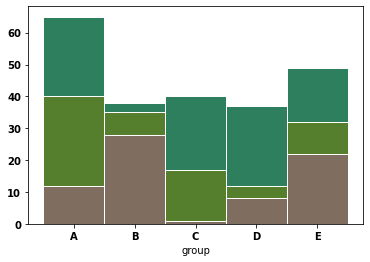

In [270]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
#rc('font', weight='bold')
 
# Values of each group
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]
bars3 = [25, 3, 23, 25, 17]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist() #If I'm working with pandas series or arrays, no need to call np.add
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()

Loop para manipular colunas ou linhas. Vide abaixo **lambda**

In [210]:
dfperc = pd.DataFrame()
for col in df:
    dfperc[col] = (df[col]/df.Total)
dfperc

,9-11,<9,College,Don't know,HS/GED,Some college/AA,Total
Ages,,,,,,,
18 to 30,0.096585,0.045854,0.271220,0.000000,0.231220,0.355122,1.0
31 to 40,0.119099,0.099785,0.283262,0.000000,0.195279,0.302575,1.0
41 to 50,0.124031,0.108527,0.287929,0.000000,0.189369,0.290144,1.0
51 to 60,0.132035,0.112554,0.238095,0.000000,0.238095,0.279221,1.0
61 to 70,0.126424,0.169704,0.214123,0.000000,0.218679,0.271071,1.0
71 to 80,0.108374,0.201970,0.192118,0.003695,0.226601,0.267241,1.0


In [364]:
df.index

CategoricalIndex(['18 to 30', '31 to 40', '41 to 50', '51 to 60', '61 to 70',
                  '71 to 80'],
                 categories=['18 to 30', '31 to 40', '41 to 50', '51 to 60', '61 to 70', '71 to 80'], ordered=True, name='Ages', dtype='category')

([<matplotlib.axis.XTick at 0x1a34d458760>,
 [Text(0, 0, '18 to 30'),
  Text(0, 0, '31 to 40'),
  Text(0, 0, '41 to 50'),
  Text(0, 0, '51 to 60'),
  Text(0, 0, '61 to 70'),
  Text(0, 0, '71 to 80')])

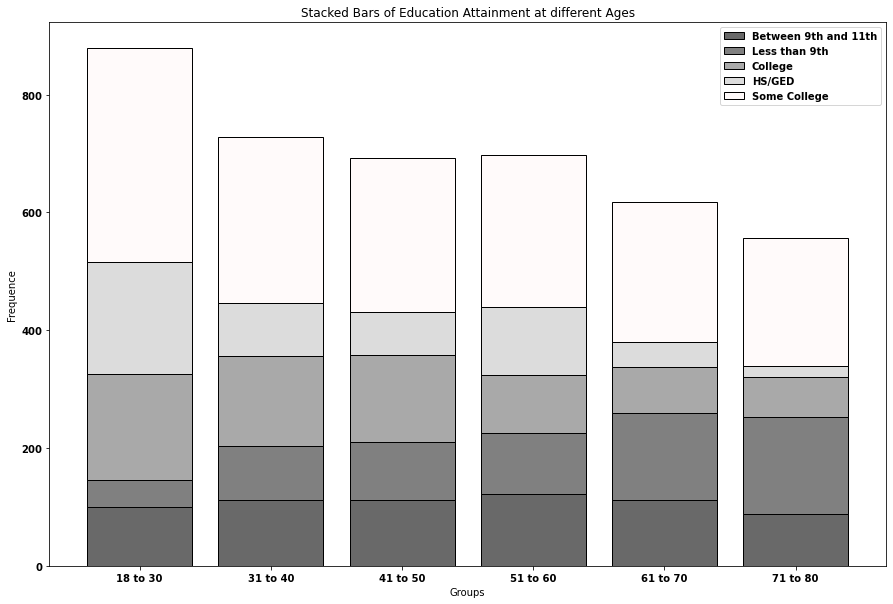

In [375]:
# The position of the bars on the x-axis
barposition = df.index
plt.figure(figsize = (15,10))
plt.bar (barposition,
        df.iloc[:,0],
        color = 'dimgray' ,
        edgecolor = 'black',
        label = "Between 9th and 11th")
plt.bar (barposition, df.iloc[:,1], bottom = df.iloc[:,0], color = 'gray', edgecolor = 'black', label = "Less than 9th")
plt.bar (barposition, df.iloc[:,2], bottom = df.iloc[:,1] + df.iloc[:,0], color = 'darkgrey', edgecolor = 'black', label = "College")
#plt.bar (barposition, df.iloc[:,3], bottom = df.iloc[:,2] + df.iloc[:,1], color = 'lightgrey', edgecolor = 'black')
plt.bar (barposition, df.iloc[:,4], bottom = df.iloc[:,2] + df.iloc[:,1], color = 'gainsboro', edgecolor = 'black', label = "HS/GED")
plt.bar (barposition, df.iloc[:,5], bottom = df.iloc[:,4] + df.iloc[:,2], color = 'snow', edgecolor = 'black', label = "Some College")

plt.xlabel("Groups"), plt.ylabel("Frequence"), plt.title ("Stacked Bars of Education Attainment at different Ages")
plt.legend()
plt.xticks(ticks = barposition, labels = df.index)

The graph above shows that educational attainment is higher between younger people. It probably derives from the fact that it is easier nowadays to pursue a bachelors degree. Therefore, It is not possible to relate educational background with blood pressure.

#### Continue...

We can also stratify jointly by age and gender to explore how educational attainment varies by both of these factors simultaneously. In doing this, it is easier to interpret the results if we pivot the education levels into the columns, and normalize the counts so that they sum to 1. After doing this, the results can be interpreted as proportions or probabilities. One notable observation from this table is that for people up to age around 60, women are more likely to have graduated from college than men, but for people over aged 60, this relationship reverses.

In [46]:
da.shape

(5735, 29)

In [54]:
dx = da.loc[~da.DMDEDUC2x.isin(["Don't know"]),:]
dx1 = dx.loc[da.DMDEDUC2x.isna(),:]
dx1

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,DMDEDUC2x
8,83743,NaN,NaN,NaN,2,Male,18,5,1.0,NaN,...,NaN,72.4,166.1,26.2,NaN,NaN,NaN,NaN,2.0,NaN
16,83759,2.0,2.0,NaN,2,Female,19,1,1.0,NaN,...,66.0,100.8,175.4,32.8,40.7,38.6,35.9,104.6,1.0,NaN
54,83836,1.0,NaN,4.0,2,Female,18,1,1.0,NaN,...,78.0,68.6,156.5,28.0,36.5,34.5,28.5,89.3,2.0,NaN
59,83847,2.0,2.0,NaN,2,Male,18,3,1.0,NaN,...,62.0,71.2,185.0,20.8,45.4,36.9,27.2,77.8,2.0,NaN
67,83862,1.0,NaN,1.0,2,Female,19,2,1.0,NaN,...,72.0,60.3,157.1,24.4,34.9,36.7,29.8,78.7,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,93519,2.0,2.0,NaN,2,Male,19,5,2.0,NaN,...,NaN,54.2,164.8,20.0,41.8,33.4,25.1,72.0,2.0,NaN
5653,93562,2.0,1.0,2.0,2,Female,19,5,1.0,NaN,...,52.0,74.9,166.7,27.0,41.8,35.7,32.5,81.6,NaN,NaN
5655,93564,1.0,NaN,5.0,2,Male,18,2,1.0,NaN,...,66.0,65.7,178.7,20.6,45.3,38.5,27.0,74.2,2.0,NaN
5664,93577,2.0,2.0,NaN,2,Male,19,1,1.0,NaN,...,78.0,68.1,180.5,20.9,43.1,38.9,31.0,78.7,2.0,NaN


In [95]:
dx = da.loc[:,['age','RIAGENDRx', 'DMDEDUC2x']]
dx = dx.dropna()
dx = da.groupby(["age", "RIAGENDRx"])["DMDEDUC2x"].value_counts()
dx = dx.unstack() # Restructure the results from 'long' to 'wide'
dx = dx.drop("Don't know", axis = 1)
dx
#print(dx.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

DMDEDUC2x           9-11    <9  College  HS/GED  Some college/AA
age      RIAGENDRx                                              
18 to 30 Female     44.0  27.0    156.0   119.0            207.0
         Male       55.0  20.0    122.0   118.0            157.0
31 to 40 Female     42.0  46.0    149.0    78.0            159.0
         Male       69.0  47.0    115.0   104.0            123.0
41 to 50 Female     55.0  53.0    150.0    87.0            157.0
         Male       57.0  45.0    110.0    84.0            105.0
51 to 60 Female     55.0  48.0    115.0   110.0            142.0
         Male       67.0  56.0    105.0   110.0            116.0
61 to 70 Female     52.0  83.0     86.0    91.0            129.0
         Male       59.0  66.0    102.0   101.0            109.0
71 to 80 Female     43.0  92.0     61.0    98.0            115.0
         Male       45.0  72.0     95.0    86.0            102.0

The caracter **~** inverts the logical function. It deletes the values of your logical function

In [97]:
dx = da.loc[~da.DMDEDUC2x.isin(["Don't know"]), :]# Eliminate rare/missing values
#dx = dx.groupby(["age", "RIAGENDRx"])["DMDEDUC2x"]
#dx = dx.value_counts()
#dx = dx.unstack() # Restructure the results from 'long' to 'wide'
#dx
#print(dx.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,DMDEDUC2x,age,RIAGENDRx
0,83732,1.0,NaN,1.0,1,Male,62,3,1.0,5.0,...,184.5,27.8,43.3,43.6,35.9,101.1,2.0,College,61 to 70,Male
1,83733,1.0,NaN,6.0,1,Male,53,3,2.0,3.0,...,171.4,30.8,38.0,40.0,33.2,107.9,NaN,HS/GED,51 to 60,Male
2,83734,1.0,NaN,NaN,1,Male,78,3,1.0,3.0,...,170.1,28.8,35.6,37.0,31.0,116.5,2.0,HS/GED,71 to 80,Male
3,83735,2.0,1.0,1.0,2,Female,56,3,1.0,5.0,...,160.9,42.4,38.5,37.7,38.3,110.1,2.0,College,51 to 60,Female
4,83736,2.0,1.0,1.0,2,Female,42,4,1.0,4.0,...,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Some college/AA,41 to 50,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,Female,76,3,1.0,3.0,...,165.8,21.5,38.2,37.0,29.5,95.0,2.0,HS/GED,71 to 80,Female
5731,93696,2.0,2.0,NaN,2,Male,26,3,1.0,5.0,...,182.2,33.8,43.4,41.8,42.3,110.2,2.0,College,18 to 30,Male
5732,93697,1.0,NaN,1.0,1,Female,80,3,1.0,4.0,...,152.2,31.0,31.3,37.5,28.8,NaN,2.0,Some college/AA,71 to 80,Female
5733,93700,NaN,NaN,NaN,1,Male,35,3,2.0,1.0,...,173.3,26.0,40.3,37.5,30.6,98.9,2.0,<9,31 to 40,Male


In [394]:
dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
dx

DMDEDUC2x               9-11        <9   College    HS/GED  Some college/AA
age      RIAGENDRx                                                         
18 to 30 Female     0.079566  0.048825  0.282098  0.215190         0.374322
         Male       0.116525  0.042373  0.258475  0.250000         0.332627
31 to 40 Female     0.088608  0.097046  0.314346  0.164557         0.335443
         Male       0.150655  0.102620  0.251092  0.227074         0.268559
41 to 50 Female     0.109562  0.105578  0.298805  0.173307         0.312749
         Male       0.142145  0.112219  0.274314  0.209476         0.261845
51 to 60 Female     0.117021  0.102128  0.244681  0.234043         0.302128
         Male       0.147577  0.123348  0.231278  0.242291         0.255507
61 to 70 Female     0.117914  0.188209  0.195011  0.206349         0.292517
         Male       0.135011  0.151030  0.233410  0.231121         0.249428
71 to 80 Female     0.105134  0.224939  0.149144  0.239609         0.281174
         Male       0.112500  0.180000  0.237500  0.215000         0.255000

Learn how to do a stacked barplot [Possible link](https://python-graph-gallery.com/12-stacked-barplot-with-matplotlib/)

In [106]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])
df.agg([np.mean, 'min'],axis=1)

,mean,min
0,2.0,1.0
1,5.0,4.0
2,8.0,7.0
3,NaN,NaN


[Further practice](https://www.coursera.org/learn/understanding-visualization-data/ungradedLab/lPGsh/more-practice-univariate-analysis-using-nhanes)